<a href="https://colab.research.google.com/github/Dhanushkumar0406/SKIIRYT-AI-TRAINING-SESSION/blob/materials/ANN%20%26%20CNN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
df= pd.read_csv('titanic_cleaned.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
s= StandardScaler()

In [ ]:

y=df['Survived']
X=df.drop('Survived',axis=1)

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')  # binary output
])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=1,callbacks=[early_stopping])

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4150 - loss: 0.8316 - val_accuracy: 0.3217 - val_loss: 0.8204
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4481 - loss: 0.7728 - val_accuracy: 0.4336 - val_loss: 0.7705
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5070 - loss: 0.7400 - val_accuracy: 0.5734 - val_loss: 0.7279
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6131 - loss: 0.6886 - val_accuracy: 0.6573 - val_loss: 0.6908
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6677 - loss: 0.6517 - val_accuracy: 0.6853 - val_loss: 0.6566


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7139 - loss: 0.6669 
Test Accuracy: 0.73


In [ ]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred = (y_pred > 0.5).astype(int)
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       124
           1       0.54      0.73      0.62        55

    accuracy                           0.73       179
   macro avg       0.70      0.73      0.70       179
weighted avg       0.76      0.73      0.74       179



In [ ]:
# Import required libraries

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Keras (TensorFlow backend)
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Basic info
# df.info()
# df.head()

In [ ]:
Counter(df['Outcome'])

Counter({1: 268, 0: 500})

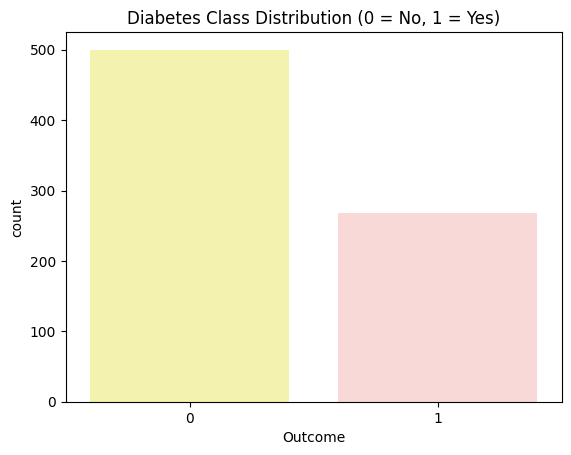

In [ ]:
sns.countplot(x='Outcome', data=df, hue='Outcome', palette=["#fffea3", "#ffd4d1"], legend=False)
plt.title("Diabetes Class Distribution (0 = No, 1 = Yes)")
plt.show()

In [ ]:
# Data cleaning - replacing values of '0' with np.nan and then imputing it with the median value of the corresponding columns (common in healthcare data)

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Impute with median
df.fillna(df.median(), inplace=True)

In [ ]:
# Assign the independent variables to X and the target column to y

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
Counter(y_train)

Counter({1: 199, 0: 377})

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({1: 377, 0: 377})

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# ANN Architecture
model = Sequential()

# Input Layer
model.add(Input(shape=(X_train_smote.shape[1],)))

# 1st Hidden Layer
model.add(Dense(units=16, activation='relu'))

# 2nd Hidden Layer
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.25))  # Dropout for regularization

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model

history = model.fit(X_train_smote, y_train_smote,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/50
19/19 - 0s - 22ms/step - accuracy: 0.8292 - loss: 0.3876 - val_accuracy: 0.7682 - val_loss: 0.4940
Epoch 2/50
19/19 - 1s - 34ms/step - accuracy: 0.8209 - loss: 0.3849 - val_accuracy: 0.7682 - val_loss: 0.4871
Epoch 3/50
19/19 - 0s - 13ms/step - accuracy: 0.8408 - loss: 0.3760 - val_accuracy: 0.7682 - val_loss: 0.4743
Epoch 4/50
19/19 - 0s - 12ms/step - accuracy: 0.8109 - loss: 0.3852 - val_accuracy: 0.7682 - val_loss: 0.4741
Epoch 5/50
19/19 - 0s - 16ms/step - accuracy: 0.8226 - loss: 0.3811 - val_accuracy: 0.7682 - val_loss: 0.4883
Epoch 6/50
19/19 - 0s - 16ms/step - accuracy: 0.8159 - loss: 0.3886 - val_accuracy: 0.7748 - val_loss: 0.4805
Epoch 7/50
19/19 - 0s - 17ms/step - accuracy: 0.8292 - loss: 0.3787 - val_accuracy: 0.7682 - val_loss: 0.4764
Epoch 8/50
19/19 - 1s - 32ms/step - accuracy: 0.8259 - loss: 0.3746 - val_accuracy: 0.7682 - val_loss: 0.4756
Epoch 9/50
19/19 - 0s - 21ms/step - accuracy: 0.8226 - loss: 0.3884 - val_accuracy: 0.7682 - val_loss: 0.4672
Epoch 10/5

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head(2)

,accuracy,loss,val_accuracy,val_loss
0,0.829187,0.387624,0.768212,0.494024
1,0.820895,0.384923,0.768212,0.487092


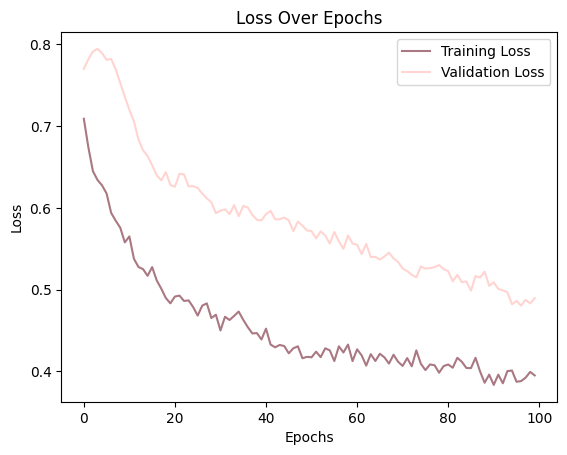

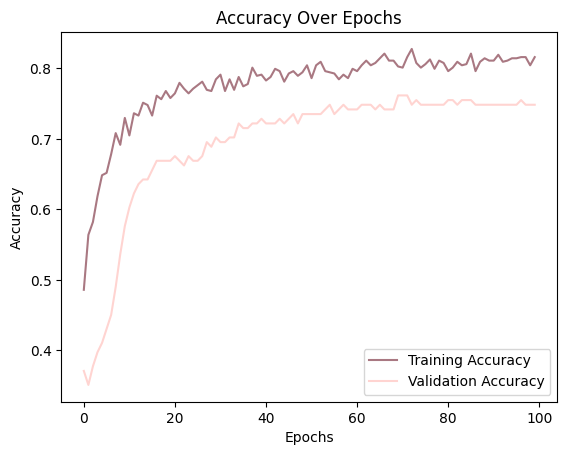

In [ ]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.plot(history_df['loss'], label='Training Loss', color='#a97882')
plt.plot(history_df['val_loss'], label='Validation Loss', color='#ffd4d1')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy', color='#a97882')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy', color='#ffd4d1')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


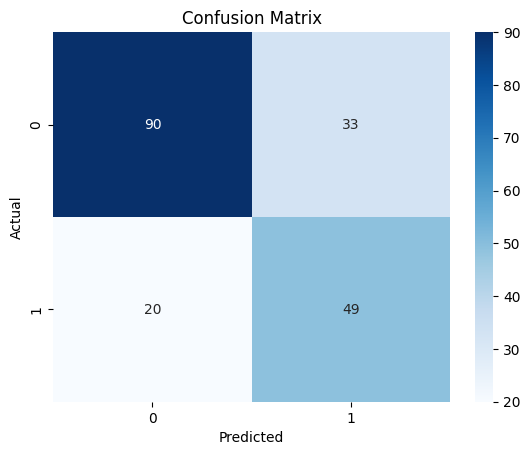

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       123
           1       0.60      0.71      0.65        69

    accuracy                           0.72       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.72      0.73       192

Accuracy Score: 0.72


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True,  cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_labels):.2f}")

In [ ]:
df= pd.read_csv('titanic_cleaned.csv')
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
y=df['Survived']
X=df.drop('Survived',axis=1)

In [ ]:
Counter(y)

Counter({0: 549, 1: 342})

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 444, 1: 268})

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
s= SMOTE()
X_train_balan,y_train_balan=s.fit_resample(X_train,y_train)
Counter(y_train_balan)

Counter({0: 444, 1: 444})

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter( y_resampled))

Resampled class distribution: Counter({0: 444, 1: 444})


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [ ]:
data['DEATH_EVENT'].unique()

array([1, 0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

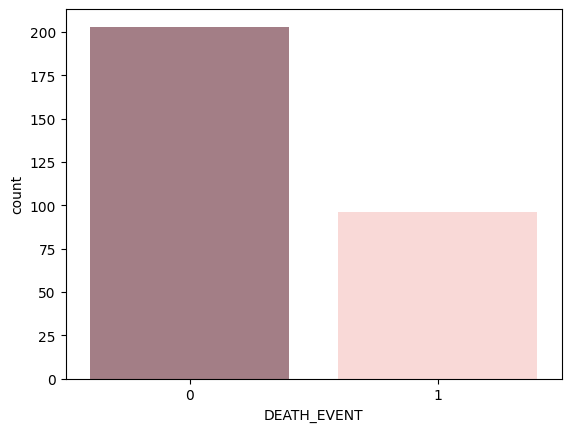

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cols = ["#a97882","#ffd4d1"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

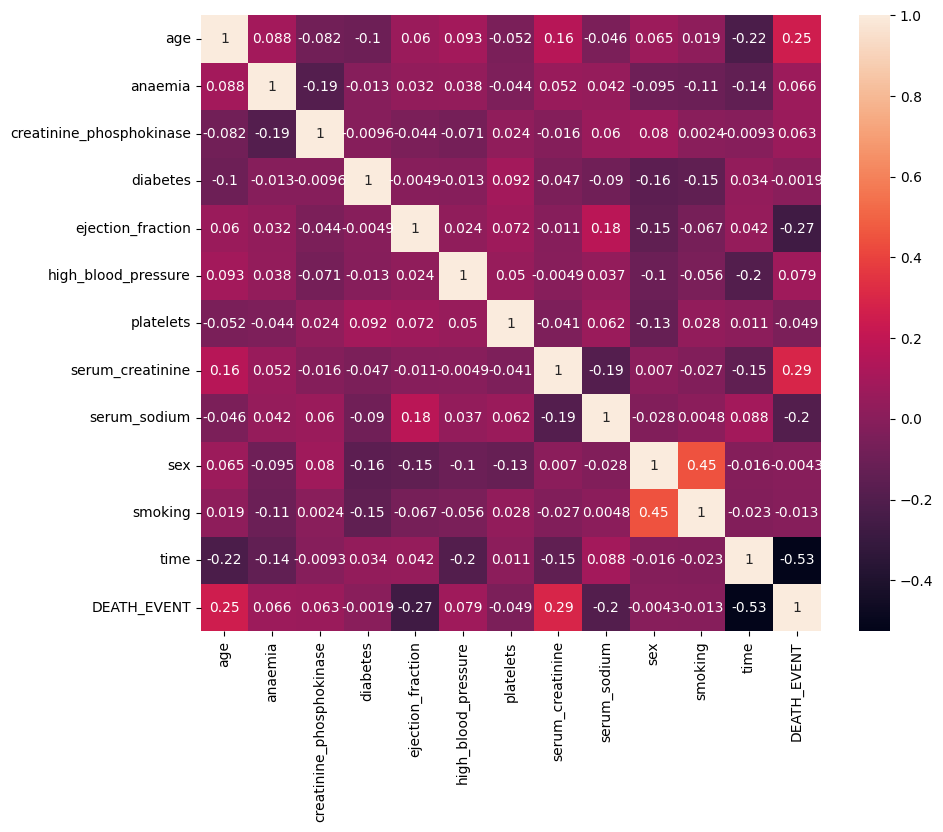

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = data.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

Text(0.5, 1.0, 'Distribution Of Age')

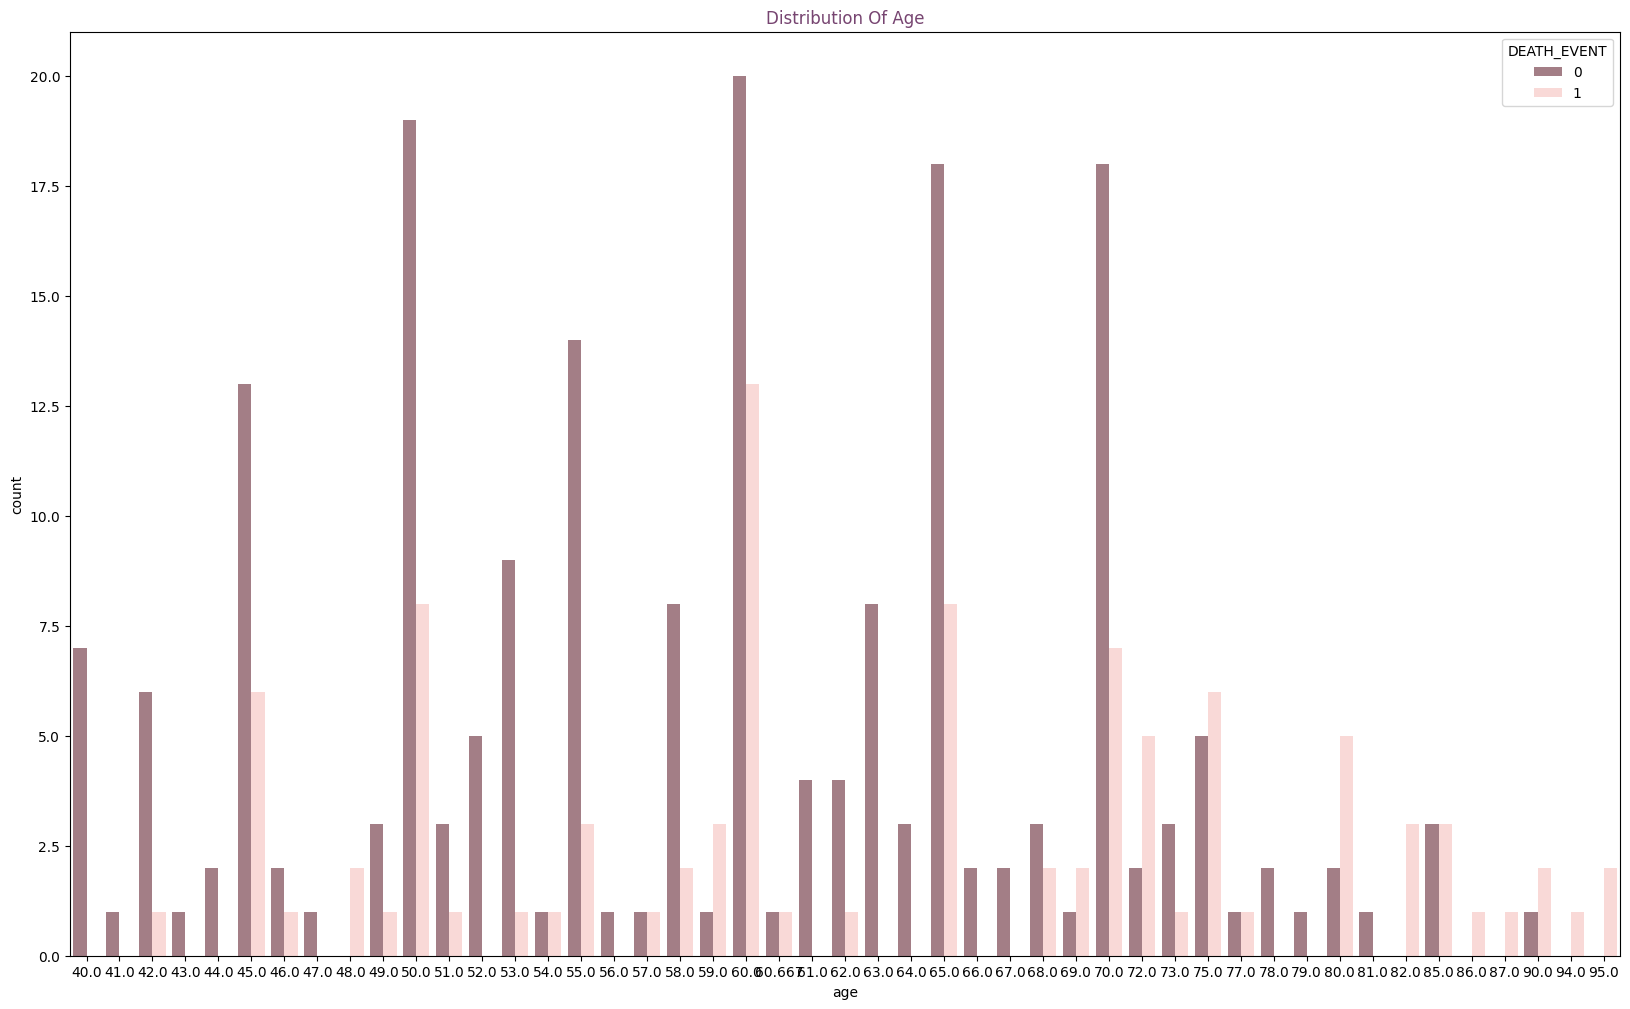

In [ ]:
#Evauating age distribution
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()
# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#from keras.optimizers import SGD
#from tensorflow.keras.optimizers import SGD
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50,callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.6108 - loss: 0.6930 - val_accuracy: 0.6667 - val_loss: 0.6922
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6282 - loss: 0.6922 - val_accuracy: 0.6667 - val_loss: 0.6913
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6529 - loss: 0.6912 - val_accuracy: 0.6667 - val_loss: 0.6903
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6483 - loss: 0.6904 - val_accuracy: 0.6667 - val_loss: 0.6893
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6304 - loss: 0.6900 - val_accuracy: 0.6667 - val_loss: 0.6884
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6326 - loss: 0.6891 - val_accuracy: 0.6667 - val_loss: 0.6874
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6340 - loss: 0.6883 - val_accuracy: 0.6667 - val_loss: 0.6864
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6465 - loss: 0.6868 - val_accuracy: 0.6667 - val_loss: 0.6852

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 77.24%


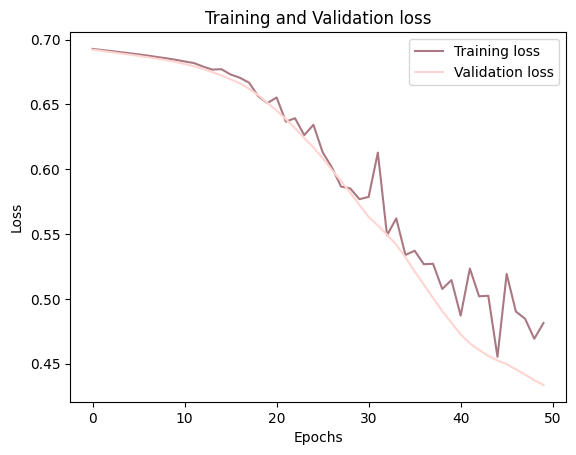

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#a97882", label='Training loss'),
plt.plot(history_df.loc[:, ['val_loss']],"#ffd4d1", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

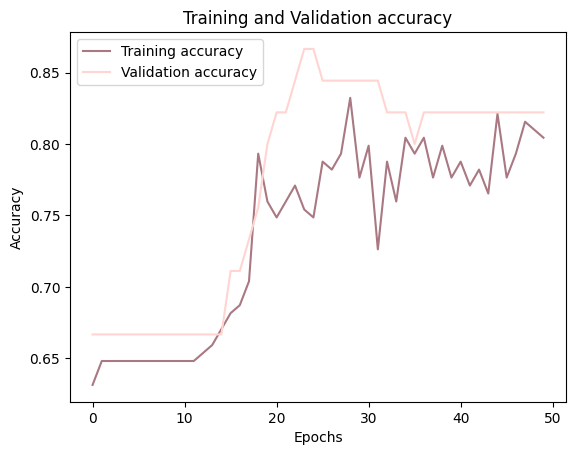

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#a97882", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#ffd4d1", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
#np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[53,  4],
       [ 7, 11]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.73      0.61      0.67        18

    accuracy                           0.85        75
   macro avg       0.81      0.77      0.79        75
weighted avg       0.85      0.85      0.85        75



In [ ]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.8533333333333334

In [ ]:
CNN

CNN MODELS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential


In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
## Normalize
X_train, X_test=X_train/255.0, X_test/255.0


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

Text(0.5, 1.0, '[8]')

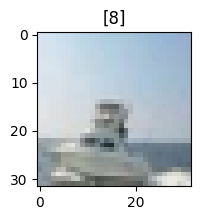

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[100])
plt.title(y_train[100])

In [ ]:
obj_names=['airplane', 'automobile',  'bird', 'cat', 'deer' , 'dog',  'frog', ' horse', 'ship',' truck']

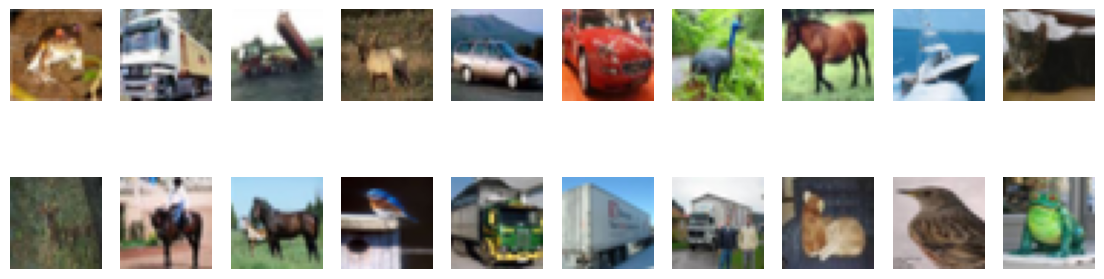

In [ ]:
plt.figure(figsize=(14,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(X_train[i])
  #plt.title(obj_names[y_train[i][0]])
  plt.axis('off')
plt.show()

CNN Model

In [ ]:
model= models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                          layers.MaxPool2D((2,2)),
                          layers.Conv2D(64,(3,3),activation='relu'),
                          layers.MaxPool2D((2,2)),
                          layers.Conv2D(64,(3,3),activation='relu'),
                          layers.Flatten(),
                          layers.Dense(64,activation='relu'),
                          layers.Dense(10,activation='softmax')
                                        ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train_cat,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 42ms/step - accuracy: 0.3509 - loss: 1.7644
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - accuracy: 0.5867 - loss: 1.1617
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6501 - loss: 0.9914
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 38ms/step - accuracy: 0.6935 - loss: 0.8786
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7181 - loss: 0.8068
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7333 - loss: 0.7565
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7527 - loss: 0.6978
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7680 - loss: 0.6625
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7873 - loss: 0.6116
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.8021 - loss: 0.5700


In [ ]:
model.evaluate(X_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7201 - loss: 0.8406


[0.8445978760719299, 0.7195000052452087]

In [ ]:
y_pred=model.predict(X_test)
y_pred1=y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [ ]:
## accuracy
y_true=y_test.flatten()
confusion_matrix(y_pred1, y_test)

array([[792,  32,  88,  35,  26,  17,   8,  25,  67,  47],
       [ 13, 825,   6,   7,   2,   6,   5,   5,  29,  75],
       [ 22,   6, 514,  52,  33,  25,  37,  18,  10,   7],
       [ 18,   7,  60, 473,  52, 136,  55,  28,  10,  11],
       [ 15,   5, 103,  58, 690,  41,  42,  55,   7,   4],
       [ 10,   4,  99, 226,  47, 674,  29,  58,   4,  11],
       [  6,  13,  67,  71,  50,  23, 806,   6,   1,   6],
       [ 17,   5,  39,  45,  90,  63,   9, 790,   5,  25],
       [ 76,  34,  18,  16,  10,  11,   5,   2, 840,  23],
       [ 31,  69,   6,  17,   0,   4,   4,  13,  27, 791]])

In [ ]:
for i in range(50):
  print('Actual:',obj_names[y_true[i]],',','Pred:',obj_names[y_pred1[i]])


Actual: cat , Pred: cat
Actual: ship , Pred: ship
Actual: ship , Pred: ship
Actual: airplane , Pred: airplane
Actual: frog , Pred: frog
Actual: frog , Pred: frog
Actual: automobile , Pred: cat
Actual: frog , Pred: frog
Actual: cat , Pred: cat
Actual: automobile , Pred: automobile
Actual: airplane , Pred: deer
Actual:  truck , Pred:  truck
Actual: dog , Pred: dog
Actual:  horse , Pred:  horse
Actual:  truck , Pred:  truck
Actual: ship , Pred: ship
Actual: dog , Pred: dog
Actual:  horse , Pred:  horse
Actual: ship , Pred: ship
Actual: frog , Pred: frog
Actual:  horse , Pred:  horse
Actual: airplane , Pred: airplane
Actual: deer , Pred: airplane
Actual:  truck , Pred:  truck
Actual: dog , Pred: deer
Actual: bird , Pred:  truck
Actual: deer , Pred: deer
Actual: airplane , Pred: airplane
Actual:  truck , Pred:  truck
Actual: frog , Pred: frog
Actual: frog , Pred: frog
Actual: dog , Pred: dog
Actual: deer , Pred: deer
Actual: dog , Pred: cat
Actual:  truck , Pred:  truck
Actual: bird , Pred: